In [1]:
train_path = './Data_set/Train'
test_path = './Data_set/Test'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import keras 
import os
from keras.layers import *
from keras.models import *
from keras.preprocessing import image

In [3]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3,3),activation = 'relu', input_shape =(224,224,3)))
model.add(Conv2D(64,(3,3),activation='relu'))

model.add(MaxPooling2D(pool_size =(2,3)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation ='relu'))
model.add(MaxPooling2D(pool_size =(2,3)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation ='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation = 'sigmoid'))

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 73, 64)       0         
_________________________________________________________________
dropout (Dropout)            (None, 110, 73, 64)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 71, 128)      73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 23, 128)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 54, 23, 128)       0

In [5]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [6]:
train_datagen = image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
)

test_dataset = image.ImageDataGenerator(rescale = 1./255)

In [8]:
train_generator = train_datagen.flow_from_directory(
    './Data_set/Train',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary'
)

Found 372 images belonging to 2 classes.


In [9]:
train_generator.class_indices

{'covid': 0, 'normal': 1}

In [10]:
validation_generator = test_dataset.flow_from_directory(
    './Data_set/Test',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary'
)

Found 20 images belonging to 2 classes.


In [11]:
validation_generator.class_indices

{'covid': 0, 'normal': 1}

In [ ]:
hist = model.fit_generator(
    train_generator,
    steps_per_epoch = 8,
    epochs =10,
    validation_data = validation_generator,
    validation_steps = 2
)

/home/rishabh/pycode/jupyterenv/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
6/8 [=====================>........] - ETA: 1:18 - loss: 3.2141 - accuracy: 0.4787

In [12]:
model.save('model_x-ray.h5')

In [13]:
model.evaluate_generator(train_generator)

/home/rishabh/pycode/jupyterenv/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.22338438034057617, 0.9704301357269287]

In [16]:
model.evaluate_generator(validation_generator)

[0.09693063050508499, 0.949999988079071]

In [14]:
model_xray = load_model('model_x-ray.h5')

In [15]:
y_actual_result = []
y_test_result = []

In [16]:
for i in os.listdir('../../Data_set/Test/normal'):
    img = image.load_img('../../Data_set/Test/normal/'+i,target_size =(224,224))
    img = image.img_to_array(img)
    img = np.expand_dims(img ,axis = 0)
    p = model_xray.predict_classes(img)
    y_test_result.append(p[0,0])
    y_actual_result.append(1)

/home/rishabh/pycode/jupyterenv/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [17]:
for i in os.listdir('../../Data_set/Test/covid'):
    img = image.load_img('../../Data_set/Test/covid/'+i,target_size =(224,224))
    img = image.img_to_array(img)
    img = np.expand_dims(img ,axis = 0)
    p = model_xray.predict_classes(img)
    y_test_result.append(p[0,0])
    y_actual_result.append(0)

In [18]:
y_actual_result = np.array(y_actual_result)
y_test_result = np.array(y_test_result)

In [19]:
from sklearn.metrics import confusion_matrix

In [20]:
cm = confusion_matrix(y_actual_result,y_test_result)

In [21]:
import seaborn as sb

<AxesSubplot:>

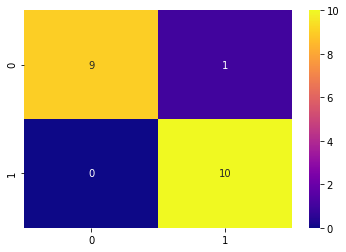

In [22]:
sb.heatmap(cm ,cmap = 'plasma' ,annot =True)